In [4]:
import findspark
findspark.init("/opt/cloudera/parcels/SPARK2-2.2.0.cloudera1-1.cdh5.12.0.p0.142354/lib/spark2/")
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('arbol_decision').getOrCreate()
import pandas

In [5]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pandas.tools.plotting import scatter_matrix
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np


In [6]:
trainning = spark.read.csv("/user/epinedac/datasets/iris", header=True, nullValue="?", inferSchema=True)
trainning.show()

+------------+-----------+------------+-----------+-------+-----+
|Sepal_Length|Sepal_Width|Petal_Length|Petal_Width|Species|label|
+------------+-----------+------------+-----------+-------+-----+
|         5.1|        3.5|         1.4|        0.2| setosa|    1|
|         4.9|        3.0|         1.4|        0.2| setosa|    1|
|         4.7|        3.2|         1.3|        0.2| setosa|    1|
|         4.6|        3.1|         1.5|        0.2| setosa|    1|
|         5.0|        3.6|         1.4|        0.2| setosa|    1|
|         5.4|        3.9|         1.7|        0.4| setosa|    1|
|         4.6|        3.4|         1.4|        0.3| setosa|    1|
|         5.0|        3.4|         1.5|        0.2| setosa|    1|
|         4.4|        2.9|         1.4|        0.2| setosa|    1|
|         4.9|        3.1|         1.5|        0.1| setosa|    1|
|         5.4|        3.7|         1.5|        0.2| setosa|    1|
|         4.8|        3.4|         1.6|        0.2| setosa|    1|
|         

In [7]:
training_data, test_data = trainning.randomSplit(weights=[0.7, 0.3], seed=12345)

In [8]:
assembler = VectorAssembler(inputCols=["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"], outputCol="features")
assem_data = assembler.transform(training_data)

assembler_test = VectorAssembler(inputCols=["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"], outputCol="features")
assem_data_test = assembler_test.transform(test_data)

In [9]:
train_scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
train_scaler_model = train_scaler.fit(assem_data)
scaled_data_train = train_scaler_model.transform(assem_data)

test_scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
test_scaler_model = test_scaler.fit(assem_data_test)
scaled_data_test = test_scaler_model.transform(assem_data_test)

In [11]:
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dtModel = dt.fit(scaled_data_train)

In [12]:
predictions = dtModel.transform(scaled_data_test)
predictions.show()

+------------+-----------+------------+-----------+----------+-----+-----------------+--------------------+------------------+-----------------+----------+
|Sepal_Length|Sepal_Width|Petal_Length|Petal_Width|   Species|label|         features|     scaled_features|     rawPrediction|      probability|prediction|
+------------+-----------+------------+-----------+----------+-----+-----------------+--------------------+------------------+-----------------+----------+
|         4.5|        2.3|         1.3|        0.3|    setosa|    1|[4.5,2.3,1.3,0.3]|[-1.6550481964773...|[0.0,38.0,0.0,0.0]|[0.0,1.0,0.0,0.0]|       1.0|
|         4.6|        3.1|         1.5|        0.2|    setosa|    1|[4.6,3.1,1.5,0.2]|[-1.5356676708297...|[0.0,38.0,0.0,0.0]|[0.0,1.0,0.0,0.0]|       1.0|
|         4.6|        3.4|         1.4|        0.3|    setosa|    1|[4.6,3.4,1.4,0.3]|[-1.5356676708297...|[0.0,38.0,0.0,0.0]|[0.0,1.0,0.0,0.0]|       1.0|
|         4.6|        3.6|         1.0|        0.2|    setosa|  

In [14]:
#codigo para obtener la matriz de confusión
predictions.createOrReplaceTempView("rf_modelpd_2")

In [15]:
spark.sql("""
            select label as real, prediction, count(1) as cantidad
              from rf_modelpd_2
              group by label, prediction
              order by 1, 2 asc
          """).show()

+----+----------+--------+
|real|prediction|cantidad|
+----+----------+--------+
|   1|       1.0|      10|
|   1|       2.0|       2|
|   2|       2.0|      12|
|   3|       2.0|       1|
|   3|       3.0|      19|
+----+----------+--------+



In [16]:
spark.stop()

In [11]:
import matplotlib.pyplot as plt

In [12]:
df_pandas=trainning.toPandas()

In [15]:
df_pandas.columns

Index([u'Sepal_Length', u'Sepal_Width', u'Petal_Length', u'Petal_Width',
       u'Species', u'label'],
      dtype='object')

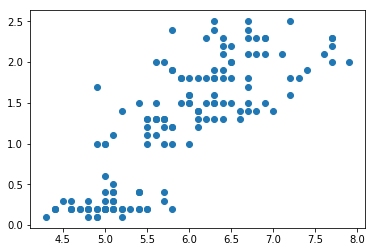

In [27]:
p1=plt.scatter(df_pandas['Sepal_Length'],df_pandas['Petal_Width'])

In [28]:
type(plot_save)

matplotlib.collections.PathCollection

In [31]:
plt.show()
plt.savefig('to_4.png') 

plt.close()

In [30]:
#help(plt.savefig)

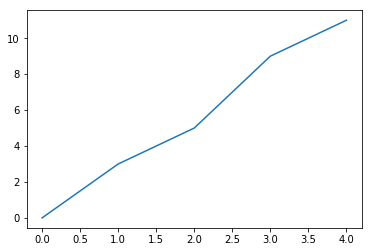

In [32]:
plt.plot([0, 1, 2, 3, 4], [0, 3, 5, 9, 11])

Text(0,0.5,'Books Read')

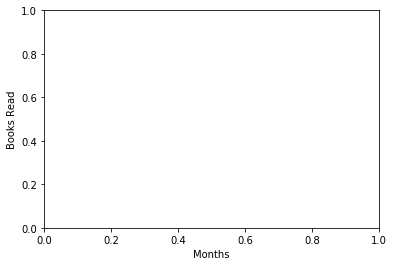

In [33]:
plt.xlabel('Months')
plt.ylabel('Books Read')

In [34]:
plt.show()

In [35]:
plt.savefig('books_read.png')

<Figure size 432x288 with 0 Axes>

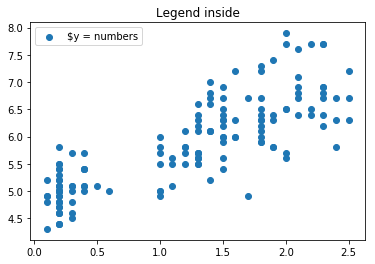

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
 
y = df_pandas['Sepal_Length']
x = df_pandas['Petal_Width']
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(x, y, label='$y = numbers')
plt.title('Legend inside')
ax.legend()
#plt.show()
 
fig.savefig('plot_3.png')